# Importation des modules 

In [4]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 349 kB 5.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 76 kB 6.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=fae134cacb47b755af04be0d3adff6801232b24179a53e32102bf027806e95d8
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [2]:
pip install scikit-survival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 5.1 MB/s 


In [5]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import warnings
from lifelines import KaplanMeierFitter
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import train_test_split, RepeatedKFold
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.exceptions import FitFailedWarning
from sksurv.metrics import concordance_index_censored
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

# Import des jeux de donn√©es (donner des noms √† chaque sc√©nario)

In [6]:
scen1_data1 = pd.read_csv("drive/MyDrive/scen1/data_scen1.csv",index_col=0)
scen1_data1.head()

X1        X2        X3        X4        X5        X6        X7  \
1 -1.504652 -1.706910 -1.156680 -1.290577 -0.367276 -1.145308 -0.603290   
2 -1.801625 -2.317740 -1.798168 -1.849040 -1.499665 -1.180965 -0.799036   
3  2.224006  2.255983  0.320314  0.748900  0.224691 -0.060714  0.312960   
4 -1.395282 -1.782209 -1.644641 -1.386603 -1.282772 -0.196608 -0.496779   
5 -1.200438 -0.690928 -0.276894 -0.854677 -0.057391 -1.224576 -0.404550   

         X8        X9       X10  ...       X43       X44       X45       X46  \
1 -1.177515 -1.261030 -1.740965  ... -2.042633 -1.585265 -1.156921 -0.739680   
2 -1.602407 -0.236973  0.217928  ... -0.129835  0.072848 -0.482063 -0.050411   
3  0.460774  0.003259 -0.770549  ...  0.394514 -0.785424 -1.088138 -1.785187   
4 -0.795624 -0.860817  0.274551  ... -2.860048 -1.009866 -0.628389 -0.301871   
5 -0.325119 -0.749458 -0.410679  ...  1.204621  0.501177  1.193891  0.302516   

        X47       X48       X49       X50    y  failed  
1 -0.799131 -0.190409 -0.525668  0.502982  100    True  
2  0.028931  1.213062  1.156208  1.113582   25   False  
3 -1.729471 -1.029751 -0.008730  0.235676  100   False  
4  0.221696 -0.178775  0.551718 -1.075839  100   False  
5  0.673416  1.035652  1.117256  0.356707  100   False  

[5 rows x 52 columns]

In [ ]:
### Loop the data lines
"""
with open("drive/MyDrive/scen1/data_scen1.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
scen1_data1 = pd.read_csv("drive/MyDrive/scen1/data_scen1.csv", delimiter=",", names=column_names)
scen1_data1.head()
"""

0                  1                  2                  3   \
0  NaN                 X1                 X2                 X3   
1  1.0  -1.50465157374885  -1.70690984240112  -1.15667961884669   
2  2.0  -1.80162456703803  -2.31773974206959  -1.79816752876684   
3  3.0   2.22400575312821   2.25598269250885  0.320313849503803   
4  4.0  -1.39528226071247  -1.78220914119294  -1.64464070123681   

                  4                   5                    6   \
0                 X4                  X5                   X6   
1   -1.2905768666253  -0.367275986828764    -1.14530771487381   
2  -1.84903973479681   -1.49966489407406     -1.1809649056971   
3  0.748900172343194   0.224691405266872  -0.0607139723983023   
4   -1.3866026435441   -1.28277157770254     -0.1966083129923   

                   7                   8                    9   ...  \
0                  X7                  X8                   X9  ...   
1  -0.603289721766942   -1.17751488196981    -1.26102974065241  ...   
2  -0.799035762778087   -1.60240664282323   -0.236973049090861  ...   
3   0.312960363243994   0.460774465458015  0.00325887779131319  ...   
4  -0.496779287882612  -0.795624334997037   -0.860817311013465  ...   

                   43                  44                  45  \
0                 X43                 X44                 X45   
1   -2.04263339535384   -1.58526521792866   -1.15692055083259   
2  -0.129835387873389  0.0728478749733865  -0.482062656242487   
3   0.394514474638278  -0.785424057677769   -1.08813791298528   
4   -2.86004806708348   -1.00986625771595  -0.628388643656288   

                   46                  47                  48  \
0                 X46                 X47                 X48   
1  -0.739680480941573  -0.799130738068576  -0.190408870253218   
2   -0.05041059506846  0.0289310783396361    1.21306181265304   
3   -1.78518651935123   -1.72947053279514   -1.02975108855489   
4  -0.301870921692584   0.221695978603564  -0.178774600382392   

                     49                 50   51      52  
0                   X49                X50    y  failed  
1    -0.525668431210715  0.502982060370051  100    TRUE  
2      1.15620799264994   1.11358150727827   25   FALSE  
3  -0.00873014556838566  0.235676070542554  100   FALSE  
4     0.551717644573294  -1.07583934333494  100   FALSE  

[5 rows x 53 columns]

In [ ]:
#scen1_data1 = scen1_data1.drop(0)
#del scen1_data1[0]
#scen1_data1.head()

KeyError: ignored

***Observations du jeu de donn√©es***

In [ ]:
scen1_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5000 non-null   float64
 1   X2      5000 non-null   float64
 2   X3      5000 non-null   float64
 3   X4      5000 non-null   float64
 4   X5      5000 non-null   float64
 5   X6      5000 non-null   float64
 6   X7      5000 non-null   float64
 7   X8      5000 non-null   float64
 8   X9      5000 non-null   float64
 9   X10     5000 non-null   float64
 10  X11     5000 non-null   float64
 11  X12     5000 non-null   float64
 12  X13     5000 non-null   float64
 13  X14     5000 non-null   float64
 14  X15     5000 non-null   float64
 15  X16     5000 non-null   float64
 16  X17     5000 non-null   float64
 17  X18     5000 non-null   float64
 18  X19     5000 non-null   float64
 19  X20     5000 non-null   float64
 20  X21     5000 non-null   float64
 21  X22     5000 non-null   float64
 22  

In [ ]:
scen1_data1.describe()

X1           X2           X3           X4           X5  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.009726     0.016375     0.011573     0.019313     0.017793   
std       0.990391     0.982979     0.997800     1.002891     1.001502   
min      -3.481207    -4.154026    -3.772366    -4.004807    -3.943297   
25%      -0.655572    -0.633608    -0.661995    -0.642918    -0.647461   
50%       0.011047     0.039270     0.027228     0.002908     0.019702   
75%       0.689794     0.680598     0.686664     0.691562     0.677057   
max       3.276240     3.199635     3.729030     3.190350     3.592875   

                X6           X7           X8           X9          X10  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      0.014906     0.013941     0.006927     0.009053     0.017094  ...   
std       1.002835     1.000055     1.009312     0.996578     1.001974  ...   
min      -4.148762    -3.652768    -3.415693    -3.923663    -3.485113  ...   
25%      -0.657323    -0.660242    -0.680330    -0.661109    -0.662784  ...   
50%       0.019944     0.015475     0.010756     0.009262     0.002998  ...   
75%       0.680703     0.687228     0.674292     0.695486     0.701386  ...   
max       3.661226     3.771416     3.669545     3.778175     3.290979  ...   

               X42          X43          X44          X45          X46  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.006448    -0.009969    -0.017352    -0.013789    -0.010779   
std       0.985021     0.975293     0.983857     0.991475     0.999279   
min      -3.695032    -3.408134    -3.901223    -3.650558    -3.750057   
25%      -0.675413    -0.674640    -0.673816    -0.675873    -0.690663   
50%      -0.010373     0.003579    -0.009524    -0.013688    -0.015864   
75%       0.655669     0.664935     0.666638     0.656352     0.666008   
max       3.476651     3.756461     3.420541     3.357584     3.343794   

               X47          X48          X49          X50            y  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean     -0.000465    -0.003441    -0.010305    -0.019973    47.025200  
std       1.001437     1.003279     1.007662     0.987049    43.556726  
min      -3.309073    -4.190666    -4.738502    -3.588608     1.000000  
25%      -0.679775    -0.676835    -0.677410    -0.665280     1.000000  
50%      -0.020509    -0.000261    -0.000281    -0.007806    29.000000  
75%       0.678784     0.643347     0.655112     0.634490   100.000000  
max       3.228606     3.674555     3.745614     3.405421   100.000000  

[8 rows x 51 columns]

In [ ]:
#scen1_data1 = scen1_data1.rename(columns = {52: 'dead'})
#scen1_data1.head()

1                   2                   3  \
1  -1.50465157374885   -1.70690984240112   -1.15667961884669   
2  -1.80162456703803   -2.31773974206959   -1.79816752876684   
3   2.22400575312821    2.25598269250885   0.320313849503803   
4  -1.39528226071247   -1.78220914119294   -1.64464070123681   
5  -1.20043847816921  -0.690928055837338  -0.276893716515125   

                    4                    5                    6  \
1    -1.2905768666253   -0.367275986828764    -1.14530771487381   
2   -1.84903973479681    -1.49966489407406     -1.1809649056971   
3   0.748900172343194    0.224691405266872  -0.0607139723983023   
4    -1.3866026435441    -1.28277157770254     -0.1966083129923   
5  -0.854676912967239  -0.0573909630881544     -1.2245760949821   

                    7                   8                    9  \
1  -0.603289721766942   -1.17751488196981    -1.26102974065241   
2  -0.799035762778087   -1.60240664282323   -0.236973049090861   
3   0.312960363243994   0.460774465458015  0.00325887779131319   
4  -0.496779287882612  -0.795624334997037   -0.860817311013465   
5  -0.404550371806297  -0.325119401574662   -0.749457557066283   

                  10  ...                  43                  44  \
1  -1.74096488023316  ...   -2.04263339535384   -1.58526521792866   
2  0.217928011543804  ...  -0.129835387873389  0.0728478749733865   
3  -0.77054919038556  ...   0.394514474638278  -0.785424057677769   
4  0.274550756416033  ...   -2.86004806708348   -1.00986625771595   
5  -0.41067887086349  ...    1.20462086534909   0.501177062037798   

                   45                  46                  47  \
1   -1.15692055083259  -0.739680480941573  -0.799130738068576   
2  -0.482062656242487   -0.05041059506846  0.0289310783396361   
3   -1.08813791298528   -1.78518651935123   -1.72947053279514   
4  -0.628388643656288  -0.301870921692584   0.221695978603564   
5    1.19389104190849   0.302516306085515   0.673415562396197   

                   48                    49                 50   51   dead  
1  -0.190408870253218    -0.525668431210715  0.502982060370051  100   TRUE  
2    1.21306181265304      1.15620799264994   1.11358150727827   25  FALSE  
3   -1.02975108855489  -0.00873014556838566  0.235676070542554  100  FALSE  
4  -0.178774600382392     0.551717644573294  -1.07583934333494  100  FALSE  
5    1.03565160785025       1.1172556490804  0.356706842755369  100  FALSE  

[5 rows x 52 columns]

# Visualisation des donn√©es 


## Heatmap des corr√©lations 

***Headmap des corr√©lations***

In [7]:
X = scen1_data1.iloc[:,0:50]

In [8]:
X.head()

X1        X2        X3        X4        X5        X6        X7  \
1 -1.504652 -1.706910 -1.156680 -1.290577 -0.367276 -1.145308 -0.603290   
2 -1.801625 -2.317740 -1.798168 -1.849040 -1.499665 -1.180965 -0.799036   
3  2.224006  2.255983  0.320314  0.748900  0.224691 -0.060714  0.312960   
4 -1.395282 -1.782209 -1.644641 -1.386603 -1.282772 -0.196608 -0.496779   
5 -1.200438 -0.690928 -0.276894 -0.854677 -0.057391 -1.224576 -0.404550   

         X8        X9       X10  ...       X41       X42       X43       X44  \
1 -1.177515 -1.261030 -1.740965  ... -2.389360 -2.472774 -2.042633 -1.585265   
2 -1.602407 -0.236973  0.217928  ...  0.739494  0.014470 -0.129835  0.072848   
3  0.460774  0.003259 -0.770549  ...  1.111541  0.874643  0.394514 -0.785424   
4 -0.795624 -0.860817  0.274551  ... -2.992289 -3.048446 -2.860048 -1.009866   
5 -0.325119 -0.749458 -0.410679  ...  0.005460  0.769259  1.204621  0.501177   

        X45       X46       X47       X48       X49       X50  
1 -1.156921 -0.739680 -0.799131 -0.190409 -0.525668  0.502982  
2 -0.482063 -0.050411  0.028931  1.213062  1.156208  1.113582  
3 -1.088138 -1.785187 -1.729471 -1.029751 -0.008730  0.235676  
4 -0.628389 -0.301871  0.221696 -0.178775  0.551718 -1.075839  
5  1.193891  0.302516  0.673416  1.035652  1.117256  0.356707  

[5 rows x 50 columns]

In [9]:
X.corr()

X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000  0.800972  0.640134  0.510085  0.418684  0.328571  0.258172   
X2   0.800972  1.000000  0.792462  0.635046  0.512021  0.406804  0.324892   
X3   0.640134  0.792462  1.000000  0.804021  0.643248  0.506885  0.405566   
X4   0.510085  0.635046  0.804021  1.000000  0.794286  0.642448  0.503194   
X5   0.418684  0.512021  0.643248  0.794286  1.000000  0.801161  0.635425   
X6   0.328571  0.406804  0.506885  0.642448  0.801161  1.000000  0.798555   
X7   0.258172  0.324892  0.405566  0.503194  0.635425  0.798555  1.000000   
X8   0.214637  0.262520  0.327214  0.406278  0.507404  0.636739  0.801241   
X9   0.167749  0.209389  0.257952  0.319905  0.399411  0.501508  0.642090   
X10  0.132499  0.168706  0.204357  0.247310  0.306293  0.386527  0.502737   
X11  0.104524  0.136399  0.166611  0.189525  0.232358  0.290887  0.383578   
X12  0.084783  0.115171  0.139713  0.152262  0.185937  0.231251  0.306252   
X13  0.072295  0.101420  0.120507  0.140803  0.162883  0.199565  0.261401   
X14  0.081306  0.109130  0.116750  0.127559  0.141810  0.168555  0.211928   
X15  0.085197  0.105624  0.112612  0.111081  0.115160  0.138690  0.173535   
X16  0.069702  0.097693  0.103041  0.096854  0.101195  0.115052  0.143883   
X17  0.063775  0.081596  0.082282  0.079179  0.078471  0.088703  0.110154   
X18  0.046784  0.064064  0.064997  0.058006  0.060683  0.066433  0.085108   
X19  0.021276  0.031282  0.037164  0.033308  0.041912  0.041642  0.076600   
X20  0.000742  0.010966  0.023622  0.031632  0.041556  0.048830  0.070575   
X21  0.016412  0.020430  0.019793  0.019022  0.032722  0.040974  0.059833   
X22  0.021785  0.018627  0.012858  0.011817  0.025443  0.036215  0.047908   
X23  0.014309  0.011712  0.005736  0.005300  0.014702  0.023657  0.034241   
X24  0.034376  0.018665  0.018092  0.017788  0.020001  0.041808  0.047476   
X25  0.025104  0.020646  0.021322  0.021025  0.012923  0.026479  0.039162   
X26  0.016432  0.010025  0.005999  0.016762  0.007386  0.007384  0.020940   
X27  0.019592  0.012011  0.004324  0.007515  0.011762  0.006975  0.019517   
X28  0.013931  0.010614  0.002135  0.007411  0.011916  0.007880  0.015794   
X29  0.017185  0.020275  0.009675  0.013657  0.019233  0.007676  0.020288   
X30  0.018150  0.020314  0.018101  0.020521  0.033465  0.028695  0.044211   
X31  0.018205  0.012131  0.009097  0.007209  0.018049  0.015135  0.029246   
X32  0.008385  0.001214  0.002910  0.004140  0.015592  0.017227  0.019473   
X33  0.010656  0.016089  0.013360  0.016072  0.026009  0.026513  0.026611   
X34  0.002118  0.014809  0.015375  0.016220  0.022050  0.016876  0.025488   
X35  0.004268  0.020944  0.023082  0.024461  0.032817  0.020500  0.023070   
X36  0.004171  0.024318  0.036280  0.034880  0.045286  0.033508  0.032553   
X37 -0.002448  0.019940  0.028964  0.027759  0.023508  0.010199  0.013701   
X38  0.007268  0.019770  0.029950  0.026529  0.018848  0.016227  0.016606   
X39  0.006851  0.016039  0.025616  0.024934  0.025512  0.018193  0.018856   
X40  0.014666  0.026148  0.038290  0.031089  0.035912  0.025381  0.025814   
X41  0.013531  0.023195  0.028619  0.028557  0.029324  0.014635  0.020322   
X42  0.010751  0.016156  0.018616  0.017620  0.009854  0.004899  0.007010   
X43  0.013891  0.018800  0.020977  0.012301  0.009654  0.001249 -0.003792   
X44  0.000383  0.003359  0.008915  0.002365  0.001025 -0.000634 -0.000148   
X45 -0.001378 -0.002362  0.001783 -0.002751 -0.001264 -0.005551  0.000661   
X46  0.006236  0.006955  0.008932  0.001565  0.000124 -0.003135  0.001257   
X47  0.007873 -0.002028 -0.003065 -0.010921 -0.011449 -0.013425 -0.009086   
X48  0.002959 -0.001986  0.002383 -0.009724 -0.013605 -0.025450 -0.031510   
X49  0.011614  0.005754  0.009883 -0.006449 -0.009031 -0.015385 -0.018108   
X50  0.003623 -0.002301  0.006791 -0.002595 -0.013884 -0.019422 -0.017595   

           X8        X9       X10  ...       X41       X42       X43  \
X1   0.2146

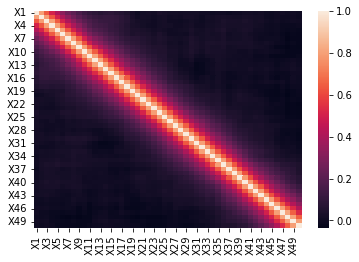

In [10]:
sns.heatmap(X.corr())

## Tableaux (descriptions de chaque variables pour d'une part les censur√©s, d'autres part les non-censur√©s et le total)

In [11]:
scen1_data1 = scen1_data1.rename(columns = {'y': 'days'})

In [12]:
y = scen1_data1.iloc[:,50:52]

In [13]:
y["failed"].value_counts()

False    4007
True      993
Name: failed, dtype: int64

On compte 4007 vivants et 993 d√©c√®s sur un total de 5000 patients. 

In [14]:
4007/5000

0.8014

Le coefficient de corr√©lation est de 0.8, donc on obtient bien la bonne valeur.

***Kaplan-Meier Estimator***

In [15]:
kmf = KaplanMeierFitter()
kmf.fit(durations = y["days"], event_observed = y["failed"], label="dead")

<lifelines.KaplanMeierFitter:"dead", fitted with 5000 total observations, 4007 right-censored observations>

 *G√©n√©ration de table d'√©v√©nement*

In [16]:
kmf.event_table

removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0      5000     5000
1.0          1266       238      1028         0     5000
2.0           235        53       182         0     3734
3.0           159        33       126         0     3499
4.0           100        20        80         0     3340
...           ...       ...       ...       ...      ...
96.0            3         2         1         0     1785
97.0            5         1         4         0     1782
98.0            4         2         2         0     1777
99.0           59         9        50         0     1773
100.0        1714       339      1375         0     1714

[83 rows x 5 columns]

*Pr√©diction des probabilit√©s de survie*

In [17]:
kmf.survival_function_

dead
timeline          
0.0       1.000000
1.0       0.952400
2.0       0.938882
3.0       0.930027
4.0       0.924458
...            ...
96.0      0.816891
97.0      0.816432
98.0      0.815513
99.0      0.811374
100.0     0.650898

[83 rows x 1 columns]

Text(0.5, 1.0, 'KMF')

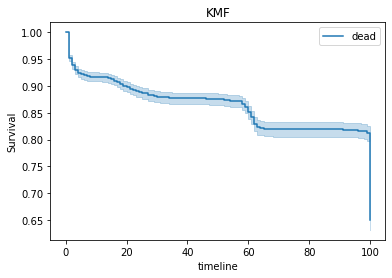

In [18]:
kmf.plot()
plt.ylabel("Survival")
plt.title("KMF")

# Mod√©lisation 


## Mod√®le de Cox sans s√©lection de variables et p√©nalit√© de Lasso

https://scikit-survival.readthedocs.io/en/stable/user_guide/understanding_predictions.html

Devoir : renommer la variable statine Xstatine + faire l'√©tude avec scikit-surv et nommer les variables X1, X2, etc... 

Ci-dessous l'estimateur de Kaplan-Meier avec le module scikit-survival.

In [19]:
#y = y.drop(columns=["d√©c√®s"])
y = y.reindex(columns=["failed", "days"])
y2=y.to_numpy()
#List of tuples
aux = [(e1,e2) for e1,e2 in y2]
#Structured array
new_y = np.array(aux, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
new_y

array([( True, 100.), (False,  25.), (False, 100.), ..., (False,   4.),
       (False,  30.), (False,  59.)],
      dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [ ]:
for treatment_type in ("X_statin", "X2"):
    mask_treat = treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        new_y["Status"][mask_treat],
        new_y["Survival_in_days"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

IndexError: ignored

In [20]:
estimator = CoxPHSurvivalAnalysis()
estimator.fit(X, new_y)

CoxPHSurvivalAnalysis()

In [24]:
estimator.deviance_ratio_

AttributeError: ignored

In [ ]:
pd.Series(estimator.coef_, index=X.columns)

X1     0.037517
X2     0.051365
X3     0.058794
X4     0.096418
X5     0.030759
X6     0.081012
X7     0.011364
X8     0.193910
X9     0.089907
X10    0.016402
X11    0.162334
X12   -0.086193
X13    0.052494
X14    0.204580
X15   -0.020309
X16    0.052034
X17    0.063224
X18    0.097980
X19    0.112338
X20   -0.010783
X21    0.203220
X22    0.011144
X23    0.076223
X24    0.088272
X25    0.052003
X26    0.083410
X27   -0.034863
X28    0.108697
X29    0.013494
X30    0.078174
X31    0.229150
X32   -0.078829
X33    0.127655
X34    0.079611
X35    0.096977
X36    0.045674
X37    0.072821
X38    0.029618
X39    0.104662
X40    0.130904
X41    0.048201
X42    0.044273
X43    0.133450
X44   -0.080165
X45    0.032874
X46    0.086857
X47    0.104971
X48    0.074267
X49    0.112306
X50    0.018814
dtype: float64

KeyboardInterrupt: ignored

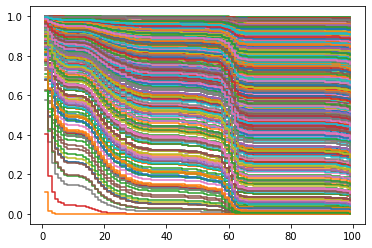

In [ ]:
pd.Series(estimator.coef_, index=X.columns)
pred_surv = estimator.predict_survival_function(X)
time_points = np.arange(1.000000, 100.000000)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

**Mesure de la performance du mod√®le de survie**

La m√©trique a utilis√© est le C-index. Pour cela, nous utilisons la fonction score de l'estimateur. 

In [ ]:
estimator.score(X, new_y)

0.8146607289990115

In [ ]:
def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(X.values, new_y)
pd.Series(scores, index=X.columns).sort_values(ascending=False)

X21    0.630188
X8     0.624094
X19    0.622119
X20    0.621878
X9     0.620921
X33    0.618873
X22    0.618697
X35    0.618410
X34    0.618384
X31    0.617810
X24    0.617783
X23    0.617270
X36    0.616410
X25    0.614207
X14    0.613932
X18    0.613831
X39    0.613258
X10    0.612406
X17    0.610418
X11    0.610327
X37    0.610089
X40    0.609263
X15    0.609125
X16    0.608001
X30    0.607068
X13    0.606724
X32    0.606248
X7     0.606201
X38    0.604674
X26    0.604142
X28    0.604121
X12    0.602302
X27    0.600874
X6     0.600286
X29    0.600255
X5     0.595869
X41    0.595325
X4     0.589538
X43    0.584170
X42    0.584048
X3     0.583998
X2     0.574783
X47    0.569933
X48    0.568643
X44    0.566738
X1     0.564462
X46    0.563740
X45    0.563079
X49    0.562151
X50    0.544700
dtype: float64

Ci-dessous la fonction pour √©tudier les variations des coefficients üá∞

***Mod√®le de Cox sans s√©lection de variable + p√©nalit√© Lasso***

In [ ]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

*Lasso*

In [ ]:
cox_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01) # 0.01 est la valeur par d√©faut pour un alpha minimum
cox_lasso.fit(X, new_y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

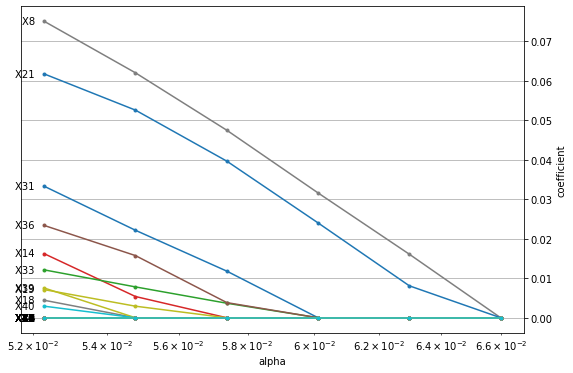

In [ ]:
coefficients_lasso = pd.DataFrame(
    cox_lasso.coef_,
    index=X.columns,
    columns=np.round(cox_lasso.alphas_, 5)
)

plot_coefficients(coefficients_lasso, n_highlight=50)

La figure ci-dessous nous montre que les coefficients convergent vers 0 pour de grandes valeurs de Œ±. Toutefois, il existe certains coefficients qui sont susceptible de converger vers 0 pour de tr√®s faible valeurs de Œ±. 

In [ ]:
# Choix de la valeur alpha pour Lasso
cox_lasso = make_pipeline(
    CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
)
cox_lasso.fit(X, new_y)
# Using the estimated set of alphas, we perform 5 fold cross-validation to estimate the performance ‚Äì in terms of concordance index ‚Äì for each Œ±.
estimated_alphas_lasso = cox_lasso.named_steps["coxnetsurvivalanalysis"].alphas_ # d'o√π √ßa vient ?
cv_lasso = KFold(n_splits=5, shuffle=True, random_state=0)
gcv_lasso = GridSearchCV(
    cox_lasso,
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas_lasso]},
    cv=cv_lasso,
    error_score=0.5, # score utilis√© par d√©faut
    n_jobs=4).fit(X, new_y)

cv_results_lasso = pd.DataFrame(gcv_lasso.cv_results_)

NameError: ignored

In [ ]:
cox_lasso.named_steps["coxnetsurvivalanalysis"]

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

In [ ]:
estimated_alphas_lasso

array([0.0659832 , 0.06298416, 0.06012143, 0.05738882, 0.05478041,
       0.05229056])

In [ ]:
alphas_lasso = cv_results_lasso.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean_lasso = cv_results_lasso.mean_test_score
std_lasso = cv_results_lasso.std_test_score

Number of non-zero coefficients: 10


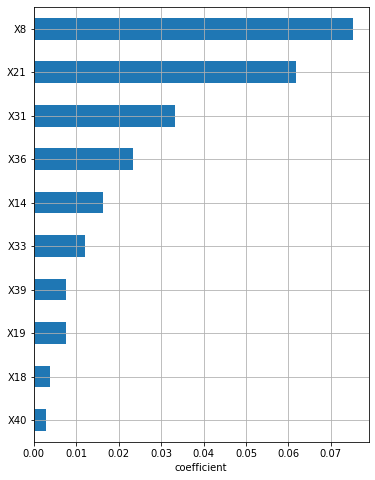

In [ ]:
best_model_lasso = gcv_lasso.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs_lasso = pd.DataFrame(
    best_model_lasso.coef_,
    index=X.columns,
    columns=["coefficient"]
)

non_zero_lasso = np.sum(best_coefs_lasso.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero_lasso))

non_zero_coefs_lasso = best_coefs_lasso.query("coefficient != 0")
coef_order_lasso = non_zero_coefs_lasso.abs().sort_values("coefficient").index

_, ax_lasso = plt.subplots(figsize=(6, 8))
non_zero_coefs_lasso.loc[coef_order_lasso].plot.barh(ax=ax_lasso, legend=False)
ax_lasso.set_xlabel("coefficient")
ax_lasso.grid(True)

In [ ]:
gcv_lasso.best_estimator_.named_steps["coxnetsurvivalanalysis"]

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, alphas=[0.05229055610859352],
                       l1_ratio=1.0)

Le mod√®le a s√©lectionn√© un total de 10 caract√©ristiques. X8 est la plus √©lev√© ici, X40 est la moins √©lev√©e.

***Survival and cumulative hazard function***

In [ ]:
coxnet_pred = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, fit_baseline_model=True)
)
coxnet_pred.set_params(**gcv.best_params_)
coxnet_pred.fit(X, new_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alphas=[0.057570340924475064],
                                        fit_baseline_model=True,
                                        l1_ratio=0.9))])

In [ ]:
surv_fns = coxnet_pred.predict_survival_function(X)

time_points = np.quantile(new_y["days"], np.linspace(0, 0.6, 100))
legend_handles = []
legend_labels = []
_, ax = plt.subplots(figsize=(9, 6))
for fn, label in zip(surv_fns, X.loc[:, "er=positive"].astype(int)):
    line, = ax.step(time_points, fn(time_points), where="post",
                   color="C{:d}".format(label), alpha=0.5)
    if len(legend_handles) <= label:
        name = "positive" if label == 1 else "negative"
        legend_labels.append(name)
        legend_handles.append(line)

ax.legend(legend_handles, legend_labels)
ax.set_xlabel("days")
ax.set_ylabel("Survival probability")
ax.grid(True)

ValueError: ignored

## Evaluation de la performance (validation crois√©e nich√©e)

### C-index (Concordance index)

Nous utilisons la m√©trique du C-index pour √©valuer la performance de notre mod√®le. 

In [ ]:
# declare the outer validation cross strategie
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# create model
model = CoxPHSurvivalAnalysis()

# c'est l√†, qu'on √©value le mod√®le 
test_score_normal = cross_val_score(model, X, new_y, cv=outer_cv, n_jobs=2)
print(f"The mean score using nested cross-validation is: "
      f"{test_score_normal.mean():.3f} ¬± {test_score_normal.std():.3f}")

The mean score using nested cross-validation is: 0.801 ¬± 0.017


Le score moyen trouv√© via l'indice de concordance (m√©trique utilis√©e pour mesurer la performance du syst√®me) est de 0.801.

In [ ]:
test_score_normal

array([0.81575633, 0.77890572, 0.78289006, 0.81004619, 0.81799245])

*Lasso*

Dans le but de r√©aliser une validation crois√©e nich√©e, nous allons tout d'abord cr√©er une nouvelle colonne avec uniquement des 0 et des 1. 

Tout d'abord, nous utiliserons GridSearch pour trouver les bons param√®tres via une validation crois√©e sur une grille de param√®tre minimale. 

Nous utiliserons une validation crois√©e interne correspondant √† la proc√©dure pr√©c√©dente ci-dessus pour optimiser uniquement les hyperparam√®tres. Nous int√©grerons √©galement cette proc√©dure de r√©glage dans une validation crois√©e externe, qui est d√©di√©e √† l'estimation de l'erreur de test de notre mod√®le r√©gl√©.

Dans ce cas, notre validation crois√©e interne obtient toujours l'ensemble d'apprentissage de la validation crois√©e externe, ce qui permet de toujours calculer les scores de test finaux sur des ensembles d'√©chantillons compl√®tement ind√©pendants.

Faisons cela en une seule fois comme suit :

In [ ]:
# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

cox_lasso = make_pipeline(
    CoxnetSurvivalAnalysis(l1_ratio=1.0)
)

# Inner cross-validation for parameter search
param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas_lasso]}
# optimise les hyperparam√®tres 
model_lasso = GridSearchCV(
    estimator=cox_lasso, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
# c'est l√†, qu'on √©value le mod√®le 
test_score_lasso = cross_val_score(model_lasso, X, new_y, cv=outer_cv, n_jobs=2)
print(f"The mean score using nested cross-validation is: "
      f"{test_score_lasso.mean():.3f} ¬± {test_score_lasso.std():.3f}")

The mean score using nested cross-validation is: 0.718 ¬± 0.025


In [ ]:
best_alphas_lasso = list(cv_results_lasso.iloc[5,6:11])

Nous aimerions mieux √©valuer la diff√©rence entre les scores de validation crois√©e imbriqu√©s et non imbriqu√©s pour montrer que ces derniers peuvent √™tre trop optimistes en pratique. Pour ce faire, nous r√©p√©tons l'exp√©rience plusieurs fois et m√©langeons les donn√©es diff√©remment pour nous assurer que notre conclusion ne d√©pend pas d'un r√©√©chantillonnage particulier des donn√©es.

In [ ]:
best_alphas_lasso

[0.7233196049422208,
 0.7084214249870433,
 0.7052121988057253,
 0.6885624503085602,
 0.7633575653134124]

In [ ]:
test_score_lasso

array([0.7233196 , 0.70842142, 0.7052122 , 0.68856245, 0.76335757])

### Courbe d'apprentissage

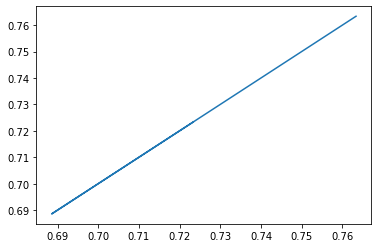

In [ ]:
x = best_alphas_lasso
y = list(test_score_lasso)

plt.plot(x,y)

plt.show() # affiche la figure √† l'√©cran

Devoir : 
- flagguer la variable statine avec X_statine
- comprendre d'o√π viennent les alphas estimer pour les lasso 
- voir √©volution des alpha pour la validation crois√©e nich√©e et voir   l'√©volution des variables s√©lectionn√©s dans le nich√©e 
- r√©union le mardi 01/08 matin √† 10h